<a href="https://colab.research.google.com/github/VAISHNAVI-ACHI/23CSBTB29/blob/main/EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("prostate.csv")
df.head()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


Standardize the Variables

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the target column is named 'lpsa' based on common prostate datasets
target_column = 'lpsa'  # Replace 'lpsa' with the correct target column name if different

scaler = StandardScaler()

# Drop the target column for scaling
scaler.fit(df.drop(target_column, axis=1))

# Transform the features
scaled_features = scaler.transform(df.drop(target_column, axis=1))

# Create a new DataFrame with scaled features
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Assuming target is the last column

df_feat.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957


Model Development and Evaluation

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor # Changed to KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df[target_column],
                                                    test_size=0.30)


knn = KNeighborsRegressor(n_neighbors=1) # Changed to KNeighborsRegressor
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Evaluate the model using regression metrics
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('R-squared:', r2_score(y_test, pred))

Mean Squared Error: 1.361995301703708
R-squared: 0.015737538071309287


Elbow Method

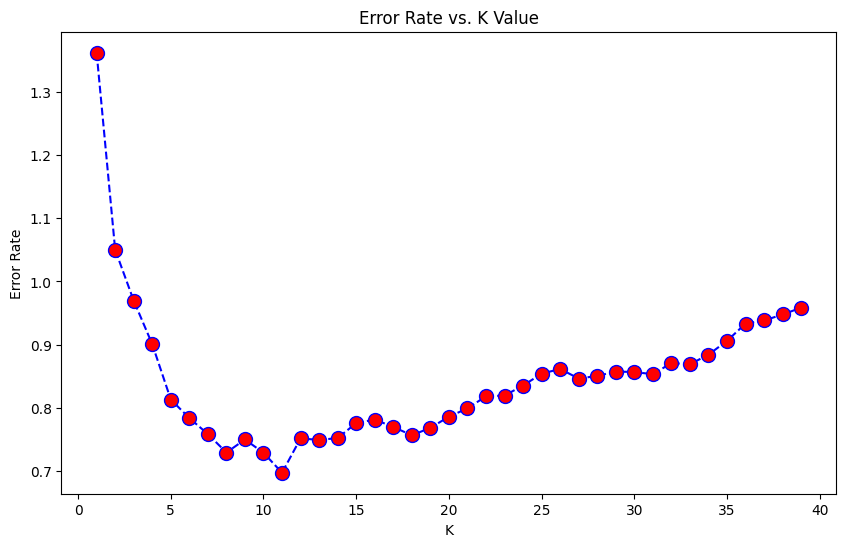

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor  # Import the correct model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

error_rate = []

# Iterate through different K values
for i in range(1, 40):
    # Initialize KNeighborsRegressor with the current K value
    knn = KNeighborsRegressor(n_neighbors=i)
    # Fit the model to the training data
    knn.fit(X_train, y_train)
    # Make predictions on the test data
    pred_i = knn.predict(X_test)
    # Calculate the mean squared error for this K value
    error_rate.append(mean_squared_error(y_test, pred_i))

# Plot the error rate against K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')  # Set the title of the plot
plt.xlabel('K')  # Label the x-axis
plt.ylabel('Error Rate')  # Label the y-axis
plt.show()  # Display the plot

In [10]:
# Instead of using KNeighborsClassifier, use KNeighborsRegressor for continuous target variables
from sklearn.neighbors import KNeighborsRegressor # Import the correct model
knn = KNeighborsRegressor(n_neighbors=1) # Changed to KNeighborsRegressor

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
# Since this is a regression problem, using confusion_matrix and classification_report is not appropriate.
# Instead, use regression metrics like mean squared error or R-squared.
from sklearn.metrics import mean_squared_error, r2_score # Import necessary metrics

print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('R-squared:', r2_score(y_test, pred))

WITH K = 1
Mean Squared Error: 1.361995301703708
R-squared: 0.015737538071309287


In [11]:
# NOW WITH K = 10
# Instead of using KNeighborsClassifier, use KNeighborsRegressor for continuous target variables
from sklearn.neighbors import KNeighborsRegressor  # Import the correct model
knn = KNeighborsRegressor(n_neighbors=10)  # Changed to KNeighborsRegressor

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')

# Since this is a regression problem, using confusion_matrix and classification_report is not appropriate.
# Instead, use regression metrics like mean squared error or R-squared.
from sklearn.metrics import mean_squared_error, r2_score  # Import necessary metrics

print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('R-squared:', r2_score(y_test, pred))

WITH K = 10
Mean Squared Error: 0.7288300584965763
R-squared: 0.47330209817454405
